<a href="https://colab.research.google.com/github/HyeonhoonLee/KIOM_KDC/blob/master/KDC_optimal_model_parameter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#KIOM 한의임상정보은행 data 분석하기

일단 데이터를 추출해서 상관분석을 전부 돌려보자.

# 라이브러리 로드

In [2]:
# 분석에 사용할 pandas, 수치계산에 사용할 numpy, 시각화에 사용할 seaborn 을 불러옵니다.
# 또, 구 버전의 주피터 노트북에서는 %matplotlib inline 설정을 되어야 노트북 안에서 그래프를 시각화 합니다.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#한글 폰트 설정

In [3]:
# Google Colab 사용 시 아래 주석을 풀고 폰트설정을 합니다.
# 로컬 아나콘다 사용 시에는 그대로 주석처리 해놓으시면 됩니다.
# 나눔고딕 설치
# 이 코드를 사용시 아래에 있는 폰트를 로드할 경우 colab에서는 오류가 발생하니
# 아래에 있는 폰트 설정은 꼭 주석처리를 해주세요. 
!apt -qq -y install fonts-nanum > /dev/null

import matplotlib.font_manager as fm

fontpath = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)

fm._rebuild()

# Colab 의 한글 폰트 설정
plt.rc('font', family='NanumGothic') 
# 마이너스 폰트 깨지는 문제에 대한 대처
plt.rc("axes", unicode_minus=False)

In [4]:
# 레티나 설정을 해주면 글씨가 좀 더 선명하게 보입니다.
# 폰트의 주변이 흐릿하게 보이는 것을 방지합니다.
%config InlineBackend.figure_format = 'retina'

#데이터 불러오기

- 데이터 로드 주소: https://www.data.go.kr/data/3072201/fileData.do
- 임상정보은행 사이트에서 상세이용방법 확인가능 (https://kdc.kiom.re.kr/html/?pmode=subpage&MMC_pid=200&spSeq=22)

In [6]:
# 다운로드 받은 파일을 판다스의 read_csv 를 통해 읽어옵니다.
# 파일을 읽어온 후 shape 로 행과 열의 수를 출력합니다.

##UTF-8이 아니면, encoding=에다가 cp949나 euc-kr을 넣어줘야한다.
df = pd.read_csv("/content/drive/My Drive/DataCollection/KIOM_KDC/data/KDC_feature.csv")
df.shape

(500, 82)

In [8]:
# sample, head, tail을 통해 데이터를 미리보기 합니다.
df.head()

,대상자식별코드,성별,만나이,직업분류,학력,결혼유무,성격_대범_섬세,성격_행동빠름_행동느림,성격_적극_소극,성격_직접_간접,성격_포기빠름_포기느림,성격_외향_내성,성격_동적_정적,성격_쉽게_어렵게,성격_남성적_여성적,성격_참을성부족_잘찾음,성격_큰편_적은편,성격_잘드러냄_안드러냄,성격_잘표현_표현안하는편,성격_가끔흥분_이성적,성격_덜렁_꼼꼼,식사량,식사속도,소화여부,소화입맛,땀정도,땀기분,대변습관,대변굳기,배변시긴박감,배변후잔변감,소변야간뇨,한열민감도,한열손부위,한열발부위,한열배부위,음수정도,음수온다,한열점수,한열그룹,...,고지혈증_진단,일반건강,수면시간(시간),수면시간(분),피로정도,피로_기상시,피로_오전,피로_오후,피로_밤,피로_하루종일,한의사체질진단,키,몸무게,BMI,이마둘레,목둘레,겨드랑이둘레,가슴둘레,늑골둘레,허리둘레,장골둘레,곡골둘레,수축기혈합,이완기혈압,혈당,총콜레스테롤,중성지방,고밀도콜레스테롤,저밀도콜레스테롤,수면시간(시간)_부족,늑골둘레_low,늑골둘레_middle,늑골둘레_high,혈당_nan,총콜레스테롤_nan,중성지방_nan,고밀도콜레스테롤_nan,저밀도콜레스테롤_nan,혈당_log,중성지방_log
0,KDCT00001,2,0.036746,2,5,2,2,2,1,2,1,1,1.0,2.0,2,3,2,2,2,1,1,2.000000,2.0,1,3,3,1.0,1,2,2.490637,2.314607,1.0,1,2,2,2,2.0,2,12.0,2.0,...,1,3.0,5,0,2,0,0,0,1,0,2,-0.372588,-0.551481,-0.421862,-1.411128,-0.532671,0.266128,0.606435,89.0,-0.140773,0.167260,0.414628,0.017181,0.342702,0.220807,0.964152,-0.652711,0.941597,0.672927,1.542199,-0.376235,-1.040833,1.344987,0.219656,0.963293,-0.652738,0.937537,0.671852,4.653960,4.290459
1,KDCT00002,2,2.013834,14,3,2,1,1,1,1,1,1,1.0,2.0,1,3,1,1,1,1,3,2.000000,2.0,1,3,1,2.0,1,2,2.490637,2.314607,1.0,2,2,2,2,2.0,3,13.0,3.0,...,1,3.0,5,0,4,0,0,1,0,0,3,-0.748940,0.221659,0.869741,1.713833,0.077630,0.774588,1.211515,93.0,0.909300,0.814851,0.871402,0.267996,-1.005102,0.453146,0.376917,-0.343301,-0.196630,0.210896,1.542199,-0.376235,-1.040833,1.344987,0.451957,0.376095,-0.343379,-0.199521,0.209862,4.709530,4.584967
2,KDCT00003,1,0.119384,3,3,2,3,1,1,1,1,1,1.0,1.0,1,2,1,1,1,1,3,3.000000,2.0,3,2,3,1.0,1,2,2.490637,2.314607,1.0,3,2,3,2,2.0,2,12.0,2.0,...,1,3.0,7,0,2,0,0,1,0,0,2,-0.121687,-0.164911,-0.114338,0.672179,0.687931,0.647473,-0.119661,83.0,-0.350787,-1.127923,-1.869239,0.079885,-0.106566,-0.747269,0.876066,-0.454689,0.047276,0.804936,-0.648425,-0.376235,0.960769,-0.743502,-0.748265,0.875213,-0.454748,0.044134,0.803849,4.382027,4.488636
3,KDCT00004,2,0.152821,14,4,2,1,1,1,1,1,1,1.0,2.0,1,1,1,2,1,1,2,2.078385,1.0,3,2,2,3.0,2,2,2.490637,2.314607,1.0,2,2,2,2,1.0,2,15.0,3.0,...,1,4.0,7,0,4,0,0,1,0,0,2,0.505566,1.478013,1.392533,1.713833,0.687931,1.283048,1.574564,90.0,0.804292,0.555815,0.871402,-0.421745,0.432555,0.065915,0.934790,0.139377,-0.359233,0.936945,-0.648425,-0.376235,-1.040833,1.344987,0.064789,0.933933,0.139222,-0.361958,0.935846,4.615121,4.919981
4,KDCT00005,1,0.093090,8,2,2,3,2,3,2,2,3,2.0,2.0,2,3,3,2,2,2,1,2.000000,1.0,1,3,1,2.0,1,2,2.490637,2.314607,0.0,1,3,3,2,1.0,2,11.0,2.0,...,1,2.0,5,0,4,0,0,1,0,0,1,0.505566,0.898158,0.715979,2.234660,1.603383,2.045738,1.332531,99.0,1.539343,1.073888,1.023660,0.581515,-0.376127,-0.243870,-0.004785,-0.788851,-1.253554,0.342905,1.542199,-0.376235,-1.040833,1.344987,-0.244946,-0.005584,-0.788856,-1.255361,0.341859,4.532599,4.127134


# 학습과 예측에 사용할 데이터셋 만들기

In [9]:
df.columns

Index(['대상자식별코드', '성별', '만나이', '직업분류', '학력', '결혼유무', '성격_대범_섬세',
       '성격_행동빠름_행동느림', '성격_적극_소극', '성격_직접_간접', '성격_포기빠름_포기느림', '성격_외향_내성',
       '성격_동적_정적', '성격_쉽게_어렵게', '성격_남성적_여성적', '성격_참을성부족_잘찾음', '성격_큰편_적은편',
       '성격_잘드러냄_안드러냄', '성격_잘표현_표현안하는편', '성격_가끔흥분_이성적', '성격_덜렁_꼼꼼', '식사량',
       '식사속도', '소화여부', '소화입맛', '땀정도', '땀기분', '대변습관', '대변굳기', '배변시긴박감',
       '배변후잔변감', '소변야간뇨', '한열민감도', '한열손부위', '한열발부위', '한열배부위', '음수정도', '음수온다',
       '한열점수', '한열그룹', '고혈압_진단', '당뇨_진단', '고지혈증_진단', '일반건강', '수면시간(시간)',
       '수면시간(분)', '피로정도', '피로_기상시', '피로_오전', '피로_오후', '피로_밤', '피로_하루종일',
       '한의사체질진단', '키', '몸무게', 'BMI', '이마둘레', '목둘레', '겨드랑이둘레', '가슴둘레', '늑골둘레',
       '허리둘레', '장골둘레', '곡골둘레', '수축기혈합', '이완기혈압', '혈당', '총콜레스테롤', '중성지방',
       '고밀도콜레스테롤', '저밀도콜레스테롤', '수면시간(시간)_부족', '늑골둘레_low', '늑골둘레_middle',
       '늑골둘레_high', '혈당_nan', '총콜레스테롤_nan', '중성지방_nan', '고밀도콜레스테롤_nan',
       '저밀도콜레스테롤_nan', '혈당_log', '중성지방_log'],
      dtype='object')

In [10]:
# 이 중 feature engineeringd에서 score가 괜찮았던 것만 고른다.
# 즉, train에 사용할 column명만 가져온다.
X = df[['성별', '만나이', '직업분류', '학력', '결혼유무', '성격_대범_섬세',
       '성격_행동빠름_행동느림', '성격_적극_소극', '성격_직접_간접', '성격_포기빠름_포기느림', '성격_외향_내성',
       '성격_동적_정적', '성격_쉽게_어렵게', '성격_남성적_여성적', '성격_참을성부족_잘찾음', '성격_큰편_적은편',
       '성격_잘드러냄_안드러냄', '성격_잘표현_표현안하는편', '성격_가끔흥분_이성적', '성격_덜렁_꼼꼼', '식사량',
       '식사속도', '소화여부', '소화입맛', '땀정도', '땀기분', '대변습관', '대변굳기', '배변시긴박감',
       '배변후잔변감', '소변야간뇨', '한열민감도', '한열손부위', '한열발부위', '한열배부위', '음수정도', '음수온다',
       '한열점수', '한열그룹', '고혈압_진단', '당뇨_진단', '고지혈증_진단', '일반건강', '피로정도', '피로_기상시', 
       '피로_오전', '피로_오후', '피로_밤', '피로_하루종일','키', '몸무게', 'BMI', '이마둘레', '목둘레', '겨드랑이둘레', 
       '가슴둘레','허리둘레', '장골둘레', '곡골둘레', '수축기혈합', '이완기혈압', '수면시간(시간)_부족', '늑골둘레_low', 
       '늑골둘레_middle', '늑골둘레_high', '총콜레스테롤_nan', '중성지방_nan', '고밀도콜레스테롤_nan',
       '저밀도콜레스테롤_nan', '혈당_log', '중성지방_log']]
X.shape

(500, 71)

In [11]:
y = df['한의사체질진단']
y.shape

(500,)

In [12]:
# 사이킷런에서 제공하는 model_selection 의 train_test_split 으로 만듭니다.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [13]:
# train 세트의 문제와 정답의 데이터 수를 확인해 주세요.

X_train.shape, y_train.shape

((400, 71), (400,))

In [14]:
# test 세트의 문제와 정답의 데이터 수를 확인해 주세요.

X_test.shape, y_test.shape

((100, 71), (100,))

# 머신러닝 알고리즘 사용하기

In [15]:
# DecisionTree 를 불러옵니다.

from sklearn.tree import DecisionTreeClassifier
#model = DecisionTreeClassifier(max_depth=11, random_state=42)
model = DecisionTreeClassifier(max_depth=11, random_state=42)
model

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=11, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

## 최적의 max_depth 값 찾기

In [ ]:
from sklearn.metrics import accuracy_score

for max_depth in range(3, 12):
    model = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    y_predict = model.fit(X_train, y_train).predict(X_test)
    score = accuracy_score(y_test, y_predict) * 100
    print(max_depth, score)

3 85.06493506493507
4 87.66233766233766
5 85.71428571428571
6 81.81818181818183
7 81.81818181818183
8 81.81818181818183
9 83.76623376623377
10 79.22077922077922
11 81.81818181818183


## Grid Search

* https://scikit-learn.org/stable/modules/cross_validation.html
* https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [ ]:
from sklearn.model_selection import GridSearchCV


model = DecisionTreeClassifier(random_state=42)
param_grid = {"max_depth": range(3, 12), 
              "max_features": [0.3, 0.5, 0.7, 0.9, 1]}
clf = GridSearchCV(model, param_grid=param_grid, n_jobs=-1, cv=5, verbose=2)
clf.fit(X_train, y_train)

Fitting 5 folds for each of 45 candidates, totalling 225 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 225 out of 225 | elapsed:    4.0s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=42,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': range(3, 12),
                         'max_

In [ ]:
clf.best_params_

{'max_depth': 5, 'max_features': 0.7}

In [ ]:
clf.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=0.7, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [ ]:
clf.best_score_

0.8664934026389444

In [ ]:
pd.DataFrame(clf.cv_results_).sort_values(by="rank_test_score").head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
12,0.006471,0.000485,0.002686,0.000658,5,0.7,"{'max_depth': 5, 'max_features': 0.7}",0.878049,0.910569,0.813008,0.837398,0.893443,0.866493,0.036082,1
7,0.006573,0.000491,0.002635,0.000312,4,0.7,"{'max_depth': 4, 'max_features': 0.7}",0.813008,0.886179,0.829268,0.861789,0.918033,0.861655,0.037935,2
8,0.006613,0.000522,0.002681,0.000637,4,0.9,"{'max_depth': 4, 'max_features': 0.9}",0.821138,0.886179,0.853659,0.853659,0.893443,0.861615,0.026005,3
18,0.006644,0.000947,0.002781,0.000535,6,0.9,"{'max_depth': 6, 'max_features': 0.9}",0.829268,0.894309,0.821138,0.878049,0.877049,0.859963,0.029149,4
27,0.006094,0.000273,0.002468,0.000401,8,0.7,"{'max_depth': 8, 'max_features': 0.7}",0.861789,0.878049,0.837398,0.853659,0.860656,0.858310,0.013162,5


In [ ]:
clf.predict(X_test)

array([1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0])

In [ ]:
clf.score(X_test, y_test)

0.8701298701298701

## Random Search
<img src="https://i.imgur.com/N17CPGj.png">

출처 : http://www.jmlr.org/papers/volume13/bergstra12a/bergstra12a.pdf

In [ ]:
model

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [ ]:
max_depth = np.random.randint(3, 20, 10)
max_depth

array([ 3,  5,  8,  5,  5, 13,  5, 16, 18, 13])

In [ ]:
max_features = np.random.uniform(0.7, 1.0, 100)

In [ ]:
param_distributions = {"max_depth" :max_depth, 
                       "max_features": max_features,
                       "min_samples_split" : list(range(2, 7))
                      }
param_distributions

{'max_depth': array([ 3,  5,  8,  5,  5, 13,  5, 16, 18, 13]),
 'max_features': array([0.99106896, 0.81855538, 0.80462666, 0.98977458, 0.73282047,
        0.82150853, 0.84194348, 0.88743413, 0.99886695, 0.87119353,
        0.76534319, 0.80883467, 0.9150284 , 0.85429453, 0.77911168,
        0.9210062 , 0.79638464, 0.99281375, 0.99780265, 0.84750491,
        0.70992737, 0.9583918 , 0.75906882, 0.83963015, 0.75394577,
        0.93916341, 0.86509081, 0.81393384, 0.91599864, 0.7415089 ,
        0.85352664, 0.89897825, 0.83836258, 0.87044418, 0.72702334,
        0.85906734, 0.8030263 , 0.81262126, 0.83317934, 0.84651679,
        0.95067863, 0.77310569, 0.97842667, 0.78061133, 0.86059737,
        0.83677233, 0.80382649, 0.8432214 , 0.9875819 , 0.82981433,
        0.83095953, 0.87872657, 0.7961058 , 0.8113246 , 0.91099763,
        0.79671905, 0.97237741, 0.90046943, 0.92105654, 0.82158186,
        0.81755379, 0.8291375 , 0.85454379, 0.77120579, 0.7363162 ,
        0.98492692, 0.75220163, 0.824

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

clf = RandomizedSearchCV(model,
                   param_distributions,
                   n_iter=1000,
                   scoring="accuracy",
                   n_jobs=-1,
                   cv=5,
                   random_state=42
                  )

clf.fit(X_train, y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',
                                                    random_state=42,
            

In [ ]:
clf.best_params_

{'min_samples_split': 4, 'max_features': 0.7415089045216909, 'max_depth': 5}

In [ ]:
clf.best_score_

0.8697454351592697

In [ ]:
clf.score(X_test, y_test)

0.8701298701298701

In [ ]:
pd.DataFrame(clf.cv_results_).sort_values(by="rank_test_score").head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,param_max_features,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
772,0.006956,0.001394,0.002171,0.000143,4,0.752202,5,"{'min_samples_split': 4, 'max_features': 0.752...",0.878049,0.910569,0.813008,0.853659,0.893443,0.869745,0.033985,1
731,0.022266,0.008578,0.005994,0.004555,4,0.709927,5,"{'min_samples_split': 4, 'max_features': 0.709...",0.878049,0.910569,0.813008,0.853659,0.893443,0.869745,0.033985,1
983,0.024347,0.034837,0.008484,0.007401,4,0.73282,5,"{'min_samples_split': 4, 'max_features': 0.732...",0.878049,0.910569,0.813008,0.853659,0.893443,0.869745,0.033985,1
687,0.005775,0.000105,0.002380,0.000491,4,0.765343,5,"{'min_samples_split': 4, 'max_features': 0.765...",0.878049,0.910569,0.813008,0.853659,0.893443,0.869745,0.033985,1
326,0.006005,0.001090,0.005060,0.005768,4,0.751261,5,"{'min_samples_split': 4, 'max_features': 0.751...",0.878049,0.910569,0.813008,0.853659,0.893443,0.869745,0.033985,1


## 학습과 예측하기

In [17]:
# 학습을 시킵니다.
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=11, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [18]:
feature_names = X_train.columns.tolist()

findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49844 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46168 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47112 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54620 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_

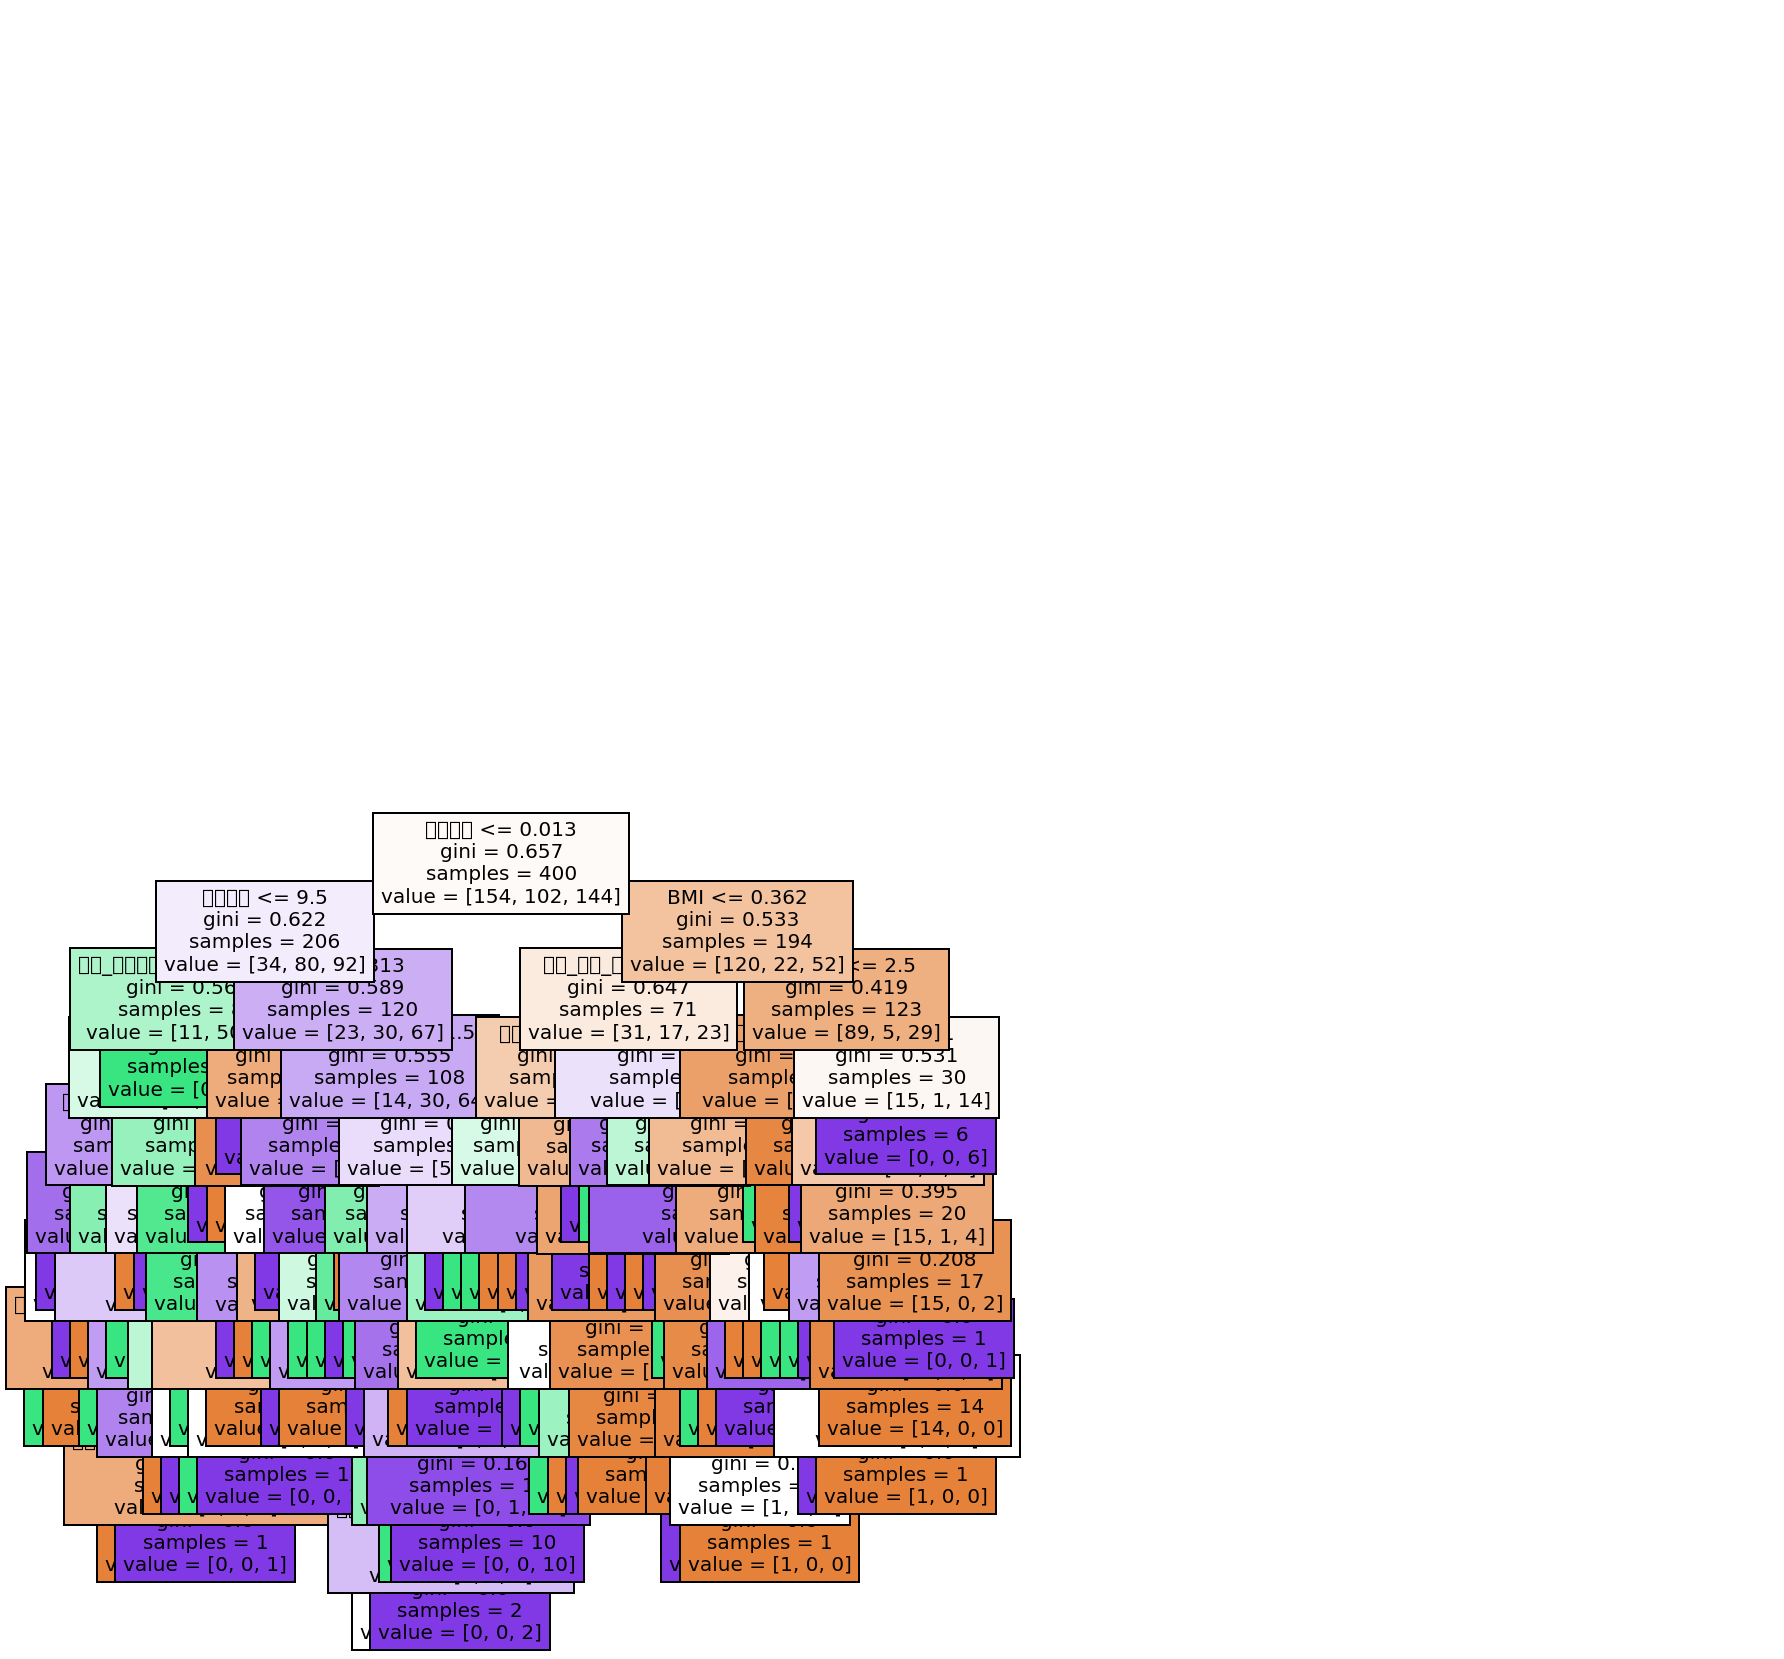

In [19]:
from sklearn.tree import plot_tree

plt.figure(figsize=(15, 15))
tree = plot_tree(model, feature_names=feature_names, fontsize=10, filled=True)

In [20]:
# 예측을 하고 결과를 y_predict에 담습니다.
y_predict = model.predict(X_test)
y_predict

array([3, 1, 2, 1, 1, 1, 3, 2, 3, 3, 3, 1, 1, 1, 3, 2, 3, 1, 3, 2, 2, 1,
       3, 2, 3, 3, 1, 1, 2, 3, 1, 1, 3, 1, 3, 2, 3, 1, 1, 1, 2, 2, 3, 1,
       3, 2, 1, 2, 3, 1, 3, 1, 2, 2, 2, 3, 1, 3, 2, 1, 2, 2, 2, 2, 1, 2,
       3, 3, 2, 3, 1, 1, 3, 2, 1, 3, 2, 1, 3, 2, 1, 2, 1, 3, 3, 3, 3, 2,
       3, 3, 1, 1, 3, 2, 3, 1, 1, 3, 3, 3])

## 정확도(Accuracy) 측정하기

In [21]:
# 예측의 정확도를 구해봅니다.
y_predict_list = y_predict.tolist()
y_test_list = y_test.tolist()
acc = 0
for i in range(len(y_predict_list)):
  if y_predict_list[i] == y_test_list[i]:
    acc += 1
print("정확도 : ", acc/len(y_predict_list))

정확도 :  0.42


In [22]:
# 위에서 처럼 직접 구할 수도 있지만 미리 구현된 알고리즘을 가져와 사용합니다.

from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_predict) * 100

42.0

In [23]:
# model 의 score 로 점수를 계산합니다.
model.score(X_test, y_test) * 100

42.0

In [ ]:
 #1 from sklearn.model_selection import train_test_split 을 이용하여
 #random하게 dataset 나누어 학습 및 예측: acc 42% => 이전에 순서대로 80% 나눈 dataset에 overfit되었음을 확인.
